# Project 4: Tartans

**Tartan** is a patterned cloth consisting of criss-crossed, horizontal and vertical bands in multiple colours. Thousands of tartan patterns that were produced for usage by various clans, places, organizations, etc. are listed in the Scottish Record of Tartans.

Our goal of this project is to produce a tartan image using _Matplot_.

## Assigned tartan:

O3 Y24 O24 WW6 Y4 FG52 O6 Y2 O6 FG52 Y4 WW6 O24 Y24 O3 

WW: \[248, 248, 248\]

FG: \[168, 148, 72\]

O: \[248, 132, 16\]

Y: \[232, 192, 0\]

Import two useful modules: `numpy` and `matplotlib`. We need *Matplot* to produce the tartan and *numpy* to create a basic shape for tartan.

In [1]:
import numpy as np                 # import numpy for numerical computations
import matplotlib.pyplot as plt    # import matplotlib for plotting graph

According to the information of the assigned tartan, we need to clarify what color we need and how much width each color should occupy. The code below generates two lists of colors and widths for tartan using the assigned pattern of stripes. 

Let the given pattern of stripes be the `assigned` variable. Use `split()` function to get a list of substrings and assigns the result to a variable called `stripe_strings`. Initialize two empty lists called `colors` and `widths`. 
Afterwards, using a `for` loop to iterate over each substring in the `stripe_strings`, extract the color codes and widths value using the `join()` and `filter()` methods. Finally, The results are added to the `colors` and `widths` lists respectively.

In [2]:
assigned = 'O3 Y24 O24 WW6 Y4 FG52 O6 Y2 O6 FG52 Y4 WW6 O24 Y24 O3' # colors = [O,  Y,  O, WW, Y, FG, O, Y, O, FG, Y, WW,  O,  Y, O]
                                                                    # widths = [3, 24, 24,  6, 4, 52, 6, 2, 6, 52, 4,  6, 24, 24, 3]
stripe_strings = assigned.split()                                   # split the string 'assigned' into a list of substrings.

colors = []                                                         # initialize two lists to contain the pattern colors and widths. 
widths = []
                                                                    
                                                                    # extract the charracters only and numbers only separately into two lists.
for s in stripe_strings:                                            # iterate over each stripe in 'stripe_strings'.
    color = ''.join(filter(str.isalpha,s))                          # using 'str.isalpha()' and 'str.isdigit()' to determine if each character is an alphabetic character or a digit.
    width = ''.join(filter(str.isdigit,s))  
    colors.append(color)                                            # add the character into list 'colors'.
    widths.append(width)                                            # add the digit into list 'widths'.


Since the elements in list `widths` are strings, but we want to access the numerical values of the elements, use a `list comprehension` to convert the elements of list `widths` into integer. The resulting list of integers is assigned to a variable called `px`. Computes the sum of the integers in the `px` list and assigns the result to a variable called `sum_px`. Same way, use a `list comprehension` creates a new list called `pattern` that contains pairs of color codes and width values. Lastly, write a code for a dictionary called `color_dict` that maps each color code to its corresponding RGB color values. The dictionary is initialized using a `dictionary literal` that contains key-value pairs for each color code.

In [3]:
px = [int(i) for i in widths]                                  # convert the strings in 'widths' into integer
sum_px = sum(px)                                               # sum(widths) = 240

pattern = [[colors[i],px[i]] for i in range(len(colors))]      # get the pattern lists containing ['color','pixel#']
color_dict = {'WW': [248, 248, 248],                           # give RGB coordinates of each color
              'FG': [168, 148, 72],
               'O': [248, 132, 16],
               'Y': [232, 192, 0]}

The code below defines a function named `make_tartan(N)`, which takes an integer argument `N` and returns a numpy array of shape `(N,N,3)` representing a tartan pattern.

Firstly, we create an array called `vertical` with shape `(N,N,3)` and fills it with zeros. Then use a `for` loop to iterate over the `pattern` and set the color values in the `vertical` array according to the pattern. The `color_dict` variable is assumed to be a dictionary mapping color names to RGB values. The loop repeats until the entire width of the array has been filled.

The function then creates an array called `horizontal` by transposing the `vertical` array. It creates a new array called `t` with shape `(N,N,3)` filled with zeros. The loop then iterates over each row of the `t` array and sets the color values according to the tartan pattern. The tartan pattern is determined by checking the row number modulo `4` and setting the color values accordingly.

Ultimately, the function returns the `t` array, which represents the completed tartan pattern.

In [4]:
def make_tartan(N):                                   # define a function named make_tartan
    vertical = np.zeros((N,N,3), dtype = int)         # get vertical stripe pattern, starte with pattern zeros and update it latter
    v = 0                                             # starting with the first vertical index
    t = N // sum_px +1                                # get the dimention of the tarten plus extra dimention needed
    for i in range(t):                                # forloop in t which gets us number of time tarten is repeated
        for j in pattern:                             # forloop into pattern to get [color, pixels#]
            vertical[:,v:v+j[1],:] = color_dict[j[0]] # get vertical stripe and matching their RGB coordinates of each color
            v = v+j[1]                                # update v
    horizontal = np.transpose(vertical,[1,0,2])       # getting the horizonal stripe pattern, using the vertical stripe pattern code (flipped)
    
    t = np.zeros((N,N,3), dtype = int)                # make a new hor/ver with zero
    
    for i in range(N):                                # for loop in the nth dimention
        if i % 4 == 0:                                # if i is in the first row
            t[i,0::4,:] = vertical[i,0::4,:]          # then from the first column is vertical line
            t[i,1::4,:] = vertical[i,1::4,:]          # from the second column is vertical line
            t[i,2::4,:] = horizontal[i,2::4,:]        # from the third column is horizontal line
            t[i,3::4,:] = horizontal[i,3::4,:]        # from the forth column is horizontal line
        elif i % 4 == 1:
            t[i,0::4,:] = horizontal[i,0::4,:]
            t[i,1::4,:] = vertical[i,1::4,:]
            t[i,2::4,:] = vertical[i,2::4,:]
            t[i,3::4,:] = horizontal[i,3::4,:]
        elif i % 4 == 2:
            t[i,0::4,:] = horizontal[i,0::4,:]
            t[i,1::4,:] = horizontal[i,1::4,:]
            t[i,2::4,:] = vertical[i,2::4,:]
            t[i,3::4,:] = vertical[i,3::4,:]
        else:
            t[i,0::4,:] = vertical[i,0::4,:]
            t[i,1::4,:] = horizontal[i,1::4,:]
            t[i,2::4,:] = horizontal[i,2::4,:]
            t[i,3::4,:] = vertical[i,3::4,:]
    return t                                          # return the knitted tartan pattern

Dimensions of the image is 500x500 threads, which means `N`$=500$. Plot ths tartan using the `plt.imshow` function.

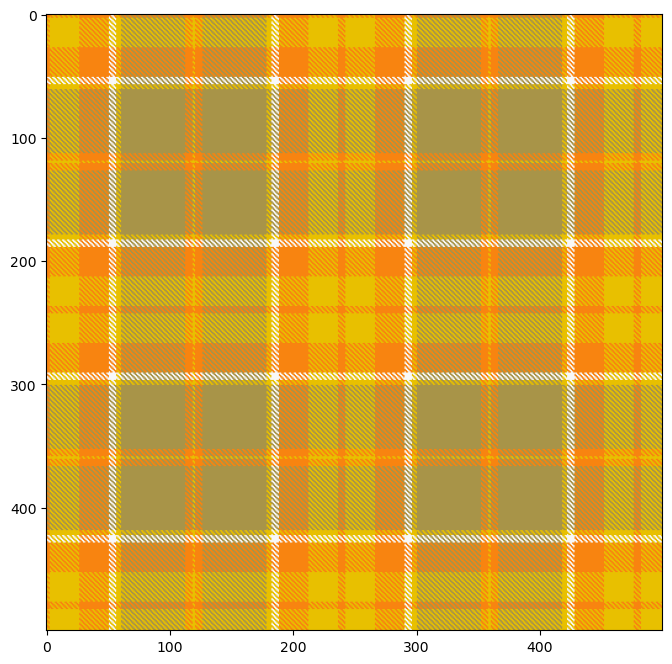

In [5]:
N = 500                      # dimension as 500
tartan = make_tartan(N)      # applied the make_tartan on N

plt.figure(figsize=(8,8))    # set the size of the tartan graph
plt.imshow(tartan)           # plot the tartan and show it

## Reference

[`join()`,`filter()`,`isalpha`,`isdigit`](https://stackoverflow.com/questions/23024942/splitting-a-string-into-a-two-separate-lists-of-numbers-and-letters-python)